<a href="https://colab.research.google.com/github/VinuthaVM/Domain-tasks/blob/main/k_nearest_neigh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

blue


<ipython-input-2-2d0b7cb5c0ce>:44: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, color='#000000')


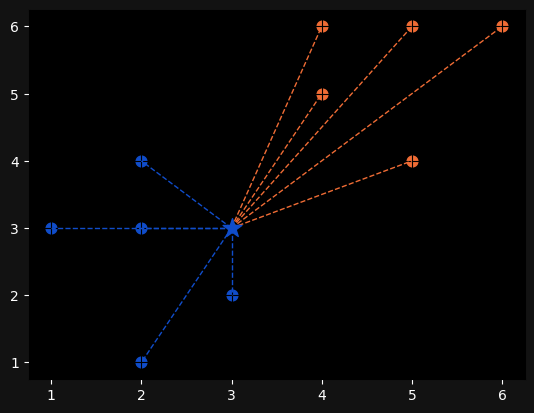

blue


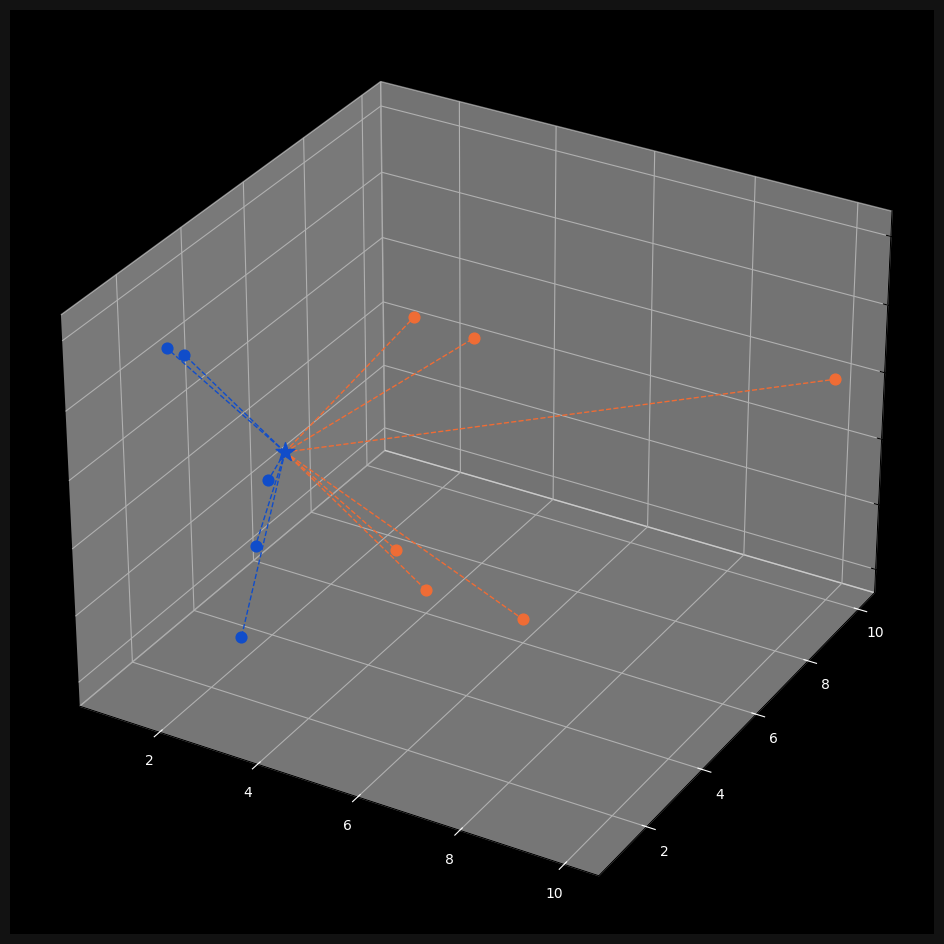

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

points = {'blue': [[2,4], [1,3], [2,3], [3,2], [2,1]],
          'orange': [[5,6], [4,5], [4,6], [6,6], [5,4]]}

new_point = [3,3]


def euclidean_distance(p, q):
    return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))


class KNearestNeighbors:

    def __init__(self, k=3):
        self.k = k
        self.points = None

    def fit(self, points):
        self.points = points

    def predict(self, new_point):
        distances = []

        for category in self.points:
            for point in self.points[category]:
                distance = euclidean_distance(point, new_point)
                distances.append([distance, category])

        categories = [category[1] for category in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result


clf = KNearestNeighbors(k=3)
clf.fit(points)
print(clf.predict(new_point))

# Visualize KNN Distances

ax = plt.subplot()
ax.grid(False, color='#000000')

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for point in points['blue']:
    ax.scatter(point[0], point[1], color='#104DCA', s=60)

for point in points['orange']:
    ax.scatter(point[0], point[1], color='#EF6C35', s=60)

new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], color=color, marker='*', s=200, zorder=100)

for point in points['blue']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#104DCA', linestyle='--', linewidth=1)

for point in points['orange']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#EF6C35', linestyle='--', linewidth=1)

plt.show()

# 3D Example

points = {'blue': [[2, 4, 3], [1, 3, 5], [2, 3, 1], [3, 2, 3], [2, 1, 6]],
          'orange': [[5, 6, 5], [4, 5, 2], [4, 6, 1], [6, 6, 1], [5, 4, 6], [10, 10, 4]]}

new_point = [3, 3, 4]

clf = KNearestNeighbors(k=3)
clf.fit(points)
print(clf.predict(new_point))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.grid(True, color='#323232')

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for point in points['blue']:
    ax.scatter(point[0], point[1], point[2], color='#104DCA', s=60)

for point in points['orange']:
    ax.scatter(point[0], point[1], point[2], color='#EF6C35', s=60)

new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], new_point[2], color=color, marker='*', s=200, zorder=100)

for point in points['blue']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='#104DCA', linestyle='--', linewidth=1)

for point in points['orange']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='#EF6C35', linestyle='--', linewidth=1)

plt.show()